In [433]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [434]:
#Definição de configurações de dataframes
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 4)
pd.set_option('display.expand_frame_repr', False)

In [435]:
#Configurando os plots para serem emandanteibidos diretamente no notebook
%matplotlib inline

In [436]:
df = pd.read_csv('dados/transformado.csv',sep=',',encoding = "UTF-8")

In [437]:
df.tail()

partida_id  rodada       mandante    visitante formacao_mandante formacao_visitante       vencedor  mandante_placar  visitante_placar clube_mandante  chutes_mandante  chutes_no_alvo_mandante  posse_de_bola_mandante  passes_mandante  precisao_passes_mandante  faltas_mandante  cartao_amarelo_mandante  cartao_vermelho_mandante  impedimentos_mandante  escanteios_mandante  rodata_visitante clube_visitante  chutes_visitante  chutes_no_alvo_visitante  posse_de_bola_visitante  passes_visitante  precisao_passes_visitante  faltas_visitante  cartao_amarelo_visitante  cartao_vermelho_visitante  impedimentos_visitante  escanteios_visitante  temporada  resultado  total_gols
1871        8021      38         Cuiaba     Coritiba           4-1-4-1            4-1-4-1         Cuiaba                2                 1         Cuiaba               17                        8                    0.57              505                      0.88                9                        1                         0                      2                    8                38        Coritiba                 4                         2                     0.43               389                       0.82                 8                         3                          1                       2                     1       2022          1           3
1872        8022      38     Bragantino   Fluminense           4-2-3-1            4-2-3-1     Fluminense                0                 1     Bragantino               13                        4                    0.41              319                      0.77               16                        3                         0                      5                    4                38      Fluminense                 8                         4                     0.59               463                       0.82                15                         2                          0                       0                     9       2022          2           1
1873        8023      38    Corinthians  Atletico-MG           4-1-4-1            4-2-3-1    Atletico-MG                0                 1    Corinthians               17                        4                    0.59              494                      0.84               11                        3                         0                      1                    5                38     Atletico-MG                17                         7                     0.41               351                       0.82                19                         6                          0                       0                     4       2022          2           1
1874        8024      38  Internacional    Palmeiras           4-2-3-1            4-2-3-1  Internacional                3                 0  Internacional               15                        8                    0.48              287                      0.77               13                        2                         0                      1                    6                38       Palmeiras                11                         2                     0.52               306                       0.82                17                         3                          0                       2                     5       2022          1           3
1875        8025      38          Goias    Sao Paulo           4-2-3-1          4-1-2-1-2      Sao Paulo                0                 4          Goias                6                        2                    0.35              330                      0.80               12                        2                         0                      1                    3                38       Sao Paulo                13                         7                     0.65               591                       0.90                14                         1                          0                       0             

In [438]:
print("Temporadas há serem analisadas: ", str(df.temporada.unique()))
print("Total de Partidas:", df.shape[0])
print("Total de Gols :", df.total_gols.sum())

Temporadas há serem analisadas:  [2018 2019 2020 2021 2022]
Total de Partidas: 1876
Total de Gols : 4344


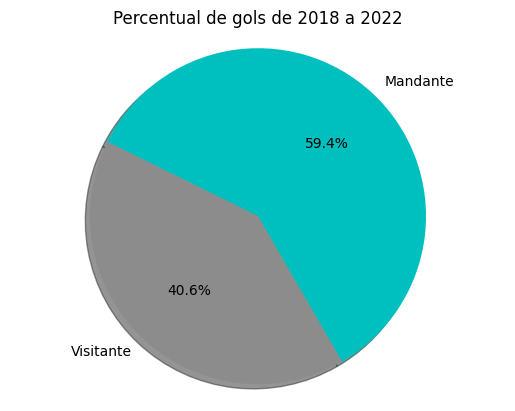

In [439]:
mandante = df.mandante_placar.sum()
visitante = df.visitante_placar.sum()
#visitante = len(df.resultado[(df['']==2)])

sizes  =[mandante,visitante]
label = ["Mandante","Visitante"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["c",".55"])
ax1.set_title("Percentual de gols de 2018 a 2022")
ax1.axis('equal')
plt.show()

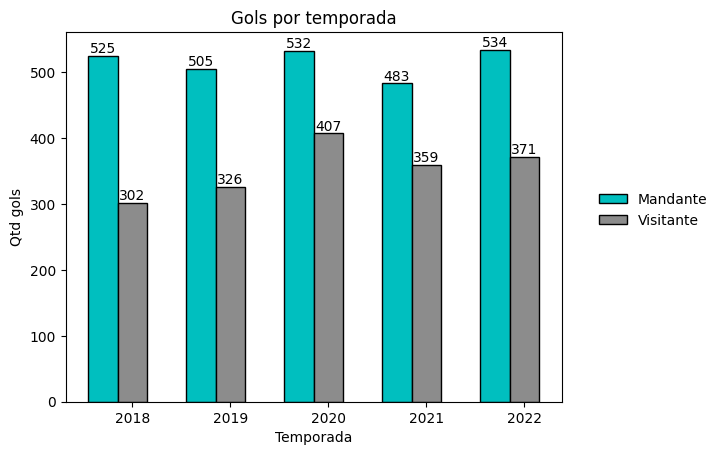

In [440]:
tgols_mandante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"mandante_placar" :'sum'})).reset_index()
tgols_visitante =  pd.DataFrame(df.groupby([df['temporada']]).agg({"visitante_placar" :'sum'})).reset_index()

width = 0.30
r1 = np.arange(len( tgols_mandante['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1, tgols_mandante['mandante_placar'], color = 'c', width = width, edgecolor = 'black', label='Mandante')
plt2 = plt.bar(r2, tgols_visitante['visitante_placar'], color = '.55',width = width, edgecolor = 'black', label="Visitante")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(tgols_mandante))],['2018','2019','2020','2021','2022'])
plt.ylabel("Qtd gols")
plt.title("Gols por temporada")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

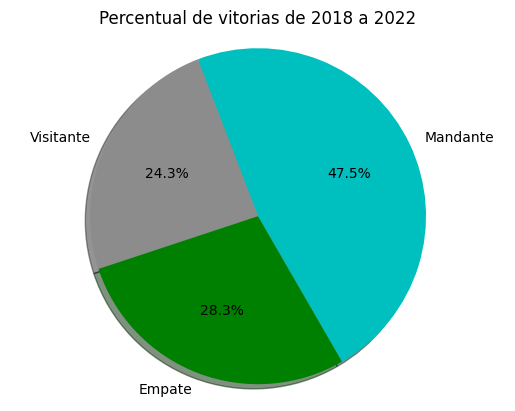

In [441]:
mandante = len(df.resultado[(df['resultado']==1)])
visitante = len(df.resultado[(df['resultado']==2)])
empate = len(df.resultado[(df['resultado']==3)])

sizes  =[mandante,visitante,empate]
label = ["Mandante","Visitante","Empate"]

fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=label,autopct='%1.1f%%', shadow=True,startangle=300,colors=["c",".55","g"])
ax1.set_title("Percentual de vitorias de 2018 a 2022")
ax1.axis('equal')
plt.show()

In [442]:
#df[[df['mandate'],df['visitante'],df['vencedor']]
dfVitoriaDerrota =  pd.DataFrame(df[['temporada','mandante','visitante','vencedor','chutes_mandante','chutes_visitante','chutes_no_alvo_mandante','chutes_no_alvo_visitante','visitante_placar','mandante_placar','passes_mandante','passes_visitante']])
dfVitoriaDerrota = dfVitoriaDerrota[(dfVitoriaDerrota['vencedor']!= '-')]

dfVitoriaDerrota['chutes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["chutes_mandante"] if x['mandante'] == x['vencedor'] else x['chutes_visitante'],axis=1)
dfVitoriaDerrota['chutes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["chutes_visitante"] if x['mandante'] == x['vencedor'] else x['chutes_mandante'],axis=1)
dfVitoriaDerrota['gols_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["mandante_placar"] if x['mandante'] == x['vencedor'] else x['visitante_placar'],axis=1)
dfVitoriaDerrota['gols_derrota'] = dfVitoriaDerrota.apply(lambda x: x["visitante_placar"] if x['mandante'] == x['vencedor'] else x['mandante_placar'],axis=1)

dfVitoriaDerrota['chutes_no_alvo_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["chutes_no_alvo_mandante"] if x['mandante'] == x['vencedor'] else x['chutes_no_alvo_visitante'],axis=1)
dfVitoriaDerrota['chutes_no_alvo_derrota'] = dfVitoriaDerrota.apply(lambda x: x["chutes_no_alvo_visitante"] if x['mandante'] == x['vencedor'] else x['chutes_no_alvo_mandante'],axis=1)

dfVitoriaDerrota['passes_vitoria'] = dfVitoriaDerrota.apply(lambda x: x["passes_mandante"] if x['mandante'] == x['vencedor'] else x['passes_visitante'],axis=1)
dfVitoriaDerrota['passes_derrota'] = dfVitoriaDerrota.apply(lambda x: x["passes_visitante"] if x['mandante'] == x['vencedor'] else x['passes_mandante'],axis=1)


dfVitoriaDerrota.tail()

temporada       mandante    visitante       vencedor  chutes_mandante  chutes_visitante  chutes_no_alvo_mandante  chutes_no_alvo_visitante  visitante_placar  mandante_placar  passes_mandante  passes_visitante  chutes_vitoria  chutes_derrota  gols_vitoria  gols_derrota  chutes_no_alvo_vitoria  chutes_no_alvo_derrota  passes_vitoria  passes_derrota
1871       2022         Cuiaba     Coritiba         Cuiaba               17                 4                        8                         2                 1                2              505               389              17               4             2             1                       8                       2             505             389
1872       2022     Bragantino   Fluminense     Fluminense               13                 8                        4                         4                 1                0              319               463               8              13             1             0                       4                       4             463             319
1873       2022    Corinthians  Atletico-MG    Atletico-MG               17                17                        4                         7                 1                0              494               351              17              17             1             0                       7                       4             351             494
1874       2022  Internacional    Palmeiras  Internacional               15                11                        8                         2                 0                3              287               306              15              11             3             0                       8                       2             287             306
1875       2022          Goias    Sao Paulo      Sao Paulo                6                13                        2                         7                 4                0              330               591              13               6             4             0                       7                       2             591             330

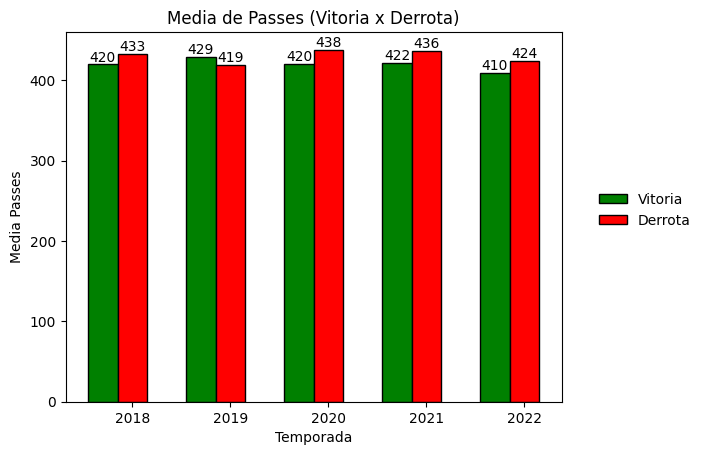

In [455]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"passes_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"passes_derrota" :'mean'})).reset_index()

width = 0.30
r1 = np.arange(len(vitoria['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.passes_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.passes_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Media Passes")
plt.title("Media de Passes (Vitoria x Derrota)")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

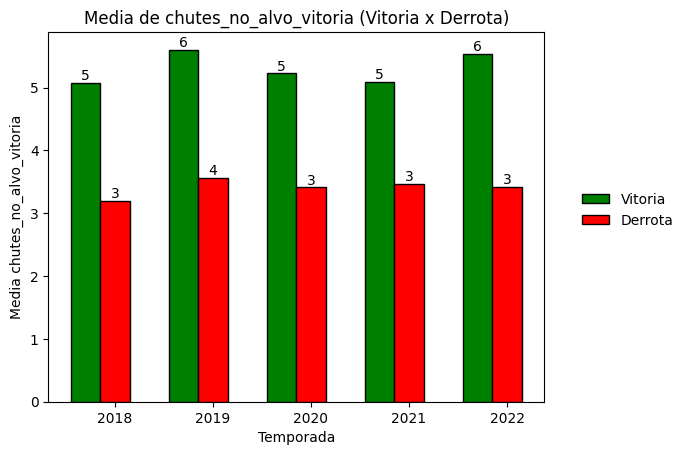

In [458]:
vitoria =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_no_alvo_vitoria" :'mean'})).reset_index()
derrota =  pd.DataFrame(dfVitoriaDerrota.groupby([dfVitoriaDerrota['temporada']]).agg({"chutes_no_alvo_derrota" :'mean'})).reset_index()

width = 0.30
r1 = np.arange(len(vitoria['temporada']))
r2 = [x + width for x in r1]

plt1 = plt.bar(r1,vitoria.chutes_no_alvo_vitoria, color = 'g', width = width, edgecolor = 'black', label='Vitoria')
plt2 = plt.bar(r2,derrota.chutes_no_alvo_derrota, color = 'r',width = width, edgecolor = 'black', label="Derrota")

plt.xlabel("Temporada")
plt.xticks([r1+ width for r1 in range(len(vitoria))],['2018','2019','2020','2021','2022'])
plt.ylabel("Media chutes_no_alvo_vitoria")
plt.title("Media de chutes_no_alvo_vitoria (Vitoria x Derrota)")

# colocando o rótulo nas barras
plt.bar_label(plt1, fmt="%.0f", size=10, label_type="edge")
plt.bar_label(plt2, fmt="%.0f", size=10, label_type="edge")
#colocar a legenda fora do enredo 
plt.legend(frameon=False,bbox_to_anchor=(1.05, 0.6) )

plt.show()

* Media de chutes_alvo x gol  - Media de (chutes x gols de vitorioso ) Vs Media de (chutes x gols derrotado)

* Analisar vitoria x derrota - Neste caso eu vou analisar gols PRO x gols Contra (Vitoriosos/derrotados)

Analisar quantos gols sofridos nos vitoriosos
Gols sofridos para derrotados

Analisar qual os  5 clubes mais vitoriosos/mais derrotados ( Em Média)    - Calculo: totalPartidas / qtdVitorias =  (10 * 2)/100 = 0,20
Comparar Mais Vitorioso com o Menos Vitorioso ( Em Média)

Ideia 1

Com a media total de vitoriosos eu fatio o dataframe em acima da média ou abaixo da média, diante deste fato eu posso analisar os dados
dos vitorios acima da média com os dados dos derrotados que estão abaixo da média.

Porque?
Eu pretendo comprovar com analise dos dados os critérios medianos para se atigir as vitorias, ou seja, o que há de diferente entre os clubes vitorios x clubes derrotados.

Ideia 2

??????

In [ ]:
#partidas_mandante = df.groupby([df['mandante']]).agg({'partida_id':'count'}).sort_values(by='partida_id').reset_index()
timesm = pd.DataFrame(df.mandante.unique())
timesv = pd.DataFrame(df.visitante.unique())

concat = pd.concat([timesm,timesv])

concat.columns= ['nome']

concat = concat.sort_values(by='nome').reset_index()

times = pd.DataFrame(concat.nome.unique())
times.columns = ['nome']


times

nome
0      America-MG
1    Athletico-PR
2     Atletico-GO
3     Atletico-MG
4            Avai
5           Bahia
6     Botafogo-RJ
7      Bragantino
8             CSA
9           Ceara
10    Chapecoense
11    Corinthians
12       Coritiba
13       Cruzeiro
14         Cuiaba
15       Flamengo
16     Fluminense
17      Fortaleza
18          Goias
19         Gremio
20  Internacional
21      Juventude
22      Palmeiras
23         Parana
24         Santos
25      Sao Paulo
26          Sport
27          Vasco
28        Vitoria

In [ ]:
#import pandas as pd

#df = pd.DataFrame({'c1': [10, 11, 12], 'c2': [100, 110, 120]})
#df = df.reset_index()  # make sure indexes pair with number of rows

#for index, row in df.iterrows():
#    print(row['c1'], row['c2'])
df3 = pd.DataFrame()

df3['time'] = df.apply(lambda x: x.mandante,axis=1)

df3


time
0          Cruzeiro
1           Vitoria
2            Santos
3        America-MG
4             Vasco
...             ...
1871         Cuiaba
1872     Bragantino
1873    Corinthians
1874  Internacional
1875          Goias

[1876 rows x 1 columns]

In [ ]:
# Criando um dataframe com qtd partidas e qtd vitorias
timem = df.groupby(df['mandante']).agg({'partida_id':'count'}).reset_index()
timev = df.groupby(df['visitante']).agg({'partida_id':'count'}).reset_index()
merg = pd.merge(timem,timev ,how='inner',right_on='visitante',left_on='mandante')
merg['total_partidas'] = merg.apply( lambda x : x['partida_id_x']+ x['partida_id_y'] ,axis=1)
merg = merg.drop(columns=['partida_id_x','visitante','partida_id_y'])
merg.rename(columns={'mandante':'time'},inplace=True)

#retirei o empate para analisar a quantidade de vitorias dos times
vitorias = pd.DataFrame(df[(df['vencedor']!='-')].groupby(df['vencedor']).agg({'vencedor':'count'}))
vitorias.rename(columns={'vencedor':'vitorias'},inplace=True)

# Inner join dos dados
df2 = pd.merge(merg,vitorias ,how='inner',right_on='vencedor',left_on='time')
#media_vitorias['media'] = media_vitorias.apply( lambda x :  x['vitorias'] / x["total_partidas"] ,axis=1 )

#media_vitorias.sort_values(by="media", inplace=True)
df2 = df2.reset_index(drop=True)

# Definindo status dos times com base na média geral de todos os times
#media_vitorias['vitoria x partidas'] = media_vitorias.apply(lambda x : 'Acima da Média' if x['media']>= 0.3239 else 'Abaixo da Média',axis=1 )

#mean 0.3239
#50$ 0.3046

In [ ]:
# Importa a biblioteca kmeans
from sklearn.cluster import KMeans
#Valores total partidas e vitorias
mm = df2.iloc[:,1:3].values

# Se não colocarmos o número de clusters, o valor default de número de clusters é de 8 clusters.
modelokm = KMeans(n_clusters=2)

# Cria o modelo de clusterização para agrupar os dados de flores
modelokm = modelokm.fit(mm)

# Mostra quais são as coordenadas de cada centroid para cada dimensão. Temos 2 dimensões e 3 clusters.
modelokm.cluster_centers_

# Mostra a quantidade de clusters
modelokm.n_clusters
labels = modelokm.labels_
# Faz a clusterização dos dados usando o modelo criado
grupos = modelokm.predict(mm)

#print(" Agrupando os clubes em 0 Grupo inferior 1 para grupo superior")
# Mostra o Gráfico de Clusters
#sns.scatterplot(x=mm[:,0], y=mm[:,1], hue=labels)
#plt.show()

C:\Users\ADM\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Dividi os times em 1º Grupo e 2º Grupo para 
t = pd.DataFrame(grupos)
t.columns = ['grupo']

df2['grupos'] =  t.apply(lambda x : '1º Grupo' if x['grupo'] == 1 else "2º Grupo",axis=1)

df2

time  total_partidas  vitorias    grupos
0      America-MG             114        38  1º Grupo
1    Athletico-PR             170        68  2º Grupo
2     Atletico-GO             114        33  1º Grupo
3     Atletico-MG             186        90  2º Grupo
4            Avai              74        11  1º Grupo
5           Bahia             152        47  2º Grupo
6     Botafogo-RJ             151        46  2º Grupo
7      Bragantino             114        38  1º Grupo
8             CSA              35         8  1º Grupo
9           Ceara             190        52  2º Grupo
10    Chapecoense             113        19  1º Grupo
11    Corinthians             189        71  2º Grupo
12       Coritiba              76        19  1º Grupo
13       Cruzeiro              73        21  1º Grupo
14         Cuiaba              76        20  1º Grupo
15       Flamengo             189       108  2º Grupo
16     Fluminense             189        78  2º Grupo
17      Fortaleza             151        57  2º Grupo
18          Goias             112        34  1º Grupo
19         Gremio             150        62  2º Grupo
20  Internacional             190        87  2º Grupo
21      Juventude              76        14  1º Grupo
22      Palmeiras             188       101  2º Grupo
23         Parana              38         4  1º Grupo
24         Santos             190        73  2º Grupo
25      Sao Paulo             188        74  2º Grupo
26          Sport             114        32  1º Grupo
27          Vasco             112        32  1º Grupo
28        Vitoria              38         9  1º Grupo

 Agrupando os clubes em 0 Grupo inferior 1 para grupo superior


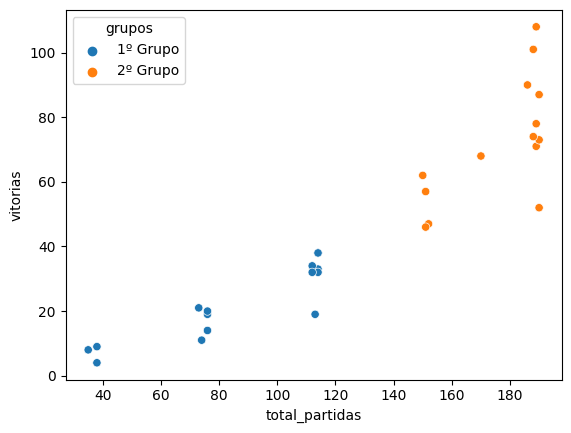

In [ ]:
print(" Agrupando os clubes em 0 Grupo inferior 1 para grupo superior")
# Compara com o Gráfico anterior
sns.scatterplot(x=df2['total_partidas'], y=df2['vitorias'], hue=df2['grupos'])
plt.show()

In [ ]:
chutes_mandante = df.groupby(df['mandante']).agg({'chutes_mandante':'sum'}).reset_index()
chutes_no_alvo_mandante  = df.groupby(df['mandante']).agg({'chutes_no_alvo_mandante':'sum'}).reset_index()
posse_de_bola_mandante  = df.groupby(df['mandante']).agg({'posse_de_bola_mandante':'sum'}).reset_index()
passes_mandante  = df.groupby(df['mandante']).agg({'passes_mandante':'sum'}).reset_index()
precisao_passes_mandante  = df.groupby(df['mandante']).agg({'precisao_passes_mandante':'sum'}).reset_index()

chutes_visitante = df.groupby(df['visitante']).agg({'chutes_visitante':'sum'}).reset_index()
chutes_no_alvo_visitante  = df.groupby(df['visitante']).agg({'chutes_no_alvo_visitante':'sum'}).reset_index()
posse_de_bola_visitante  = df.groupby(df['visitante']).agg({'posse_de_bola_visitante':'sum'}).reset_index()
passes_visitante  = df.groupby(df['visitante']).agg({'passes_visitante':'sum'}).reset_index()
precisao_passes_visitante  = df.groupby(df['visitante']).agg({'precisao_passes_visitante':'sum'}).reset_index()

In [ ]:
categorical_attributes = list(df.select_dtypes(include=['object']).columns)
numerical_attributes = list(df.select_dtypes(include=['float64', 'int64']).columns)
print('categorical_attributes:', categorical_attributes)
print('numerical_attributes:', numerical_attributes)

categorical_attributes: ['mandante', 'visitante', 'formacao_mandante', 'formacao_visitante', 'vencedor', 'clube_mandante', 'clube_visitante']
numerical_attributes: ['partida_id', 'rodada', 'mandante_placar', 'visitante_placar', 'chutes_mandante', 'chutes_no_alvo_mandante', 'posse_de_bola_mandante', 'passes_mandante', 'precisao_passes_mandante', 'faltas_mandante', 'cartao_amarelo_mandante', 'cartao_vermelho_mandante', 'impedimentos_mandante', 'escanteios_mandante', 'rodata_visitante', 'chutes_visitante', 'chutes_no_alvo_visitante', 'posse_de_bola_visitante', 'passes_visitante', 'precisao_passes_visitante', 'faltas_visitante', 'cartao_amarelo_visitante', 'cartao_vermelho_visitante', 'impedimentos_visitante', 'escanteios_visitante', 'temporada', 'resultado', 'total_gols']


In [ ]:
attmandante = ['mandante_placar','chutes_mandante','chutes_no_alvo_mandante','posse_de_bola_mandante','passes_mandante','precisao_passes_mandante','faltas_mandante','cartao_amarelo_mandante','cartao_vermelho_mandante', 'impedimentos_mandante', 'escanteios_mandante']
attvisitante = ['visitante_placar','chutes_visitante', 'chutes_no_alvo_visitante', 'posse_de_bola_visitante', 'passes_visitante', 'precisao_passes_visitante', 'faltas_visitante', 'cartao_amarelo_visitante', 'cartao_vermelho_visitante', 'impedimentos_visitante', 'escanteios_visitante']

array([[<Axes: xlabel='mandante_placar', ylabel='mandante_placar'>,
        <Axes: xlabel='chutes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='chutes_no_alvo_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='posse_de_bola_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='passes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='precisao_passes_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='faltas_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='cartao_amarelo_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='cartao_vermelho_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='impedimentos_mandante', ylabel='mandante_placar'>,
        <Axes: xlabel='escanteios_mandante', ylabel='mandante_placar'>],
       [<Axes: xlabel='mandante_placar', ylabel='chutes_mandante'>,
        <Axes: xlabel='chutes_mandante', ylabel='chutes_mandante'>,
        <Axes: xlabel='chutes_no_alvo_mandante', ylabel='chutes_

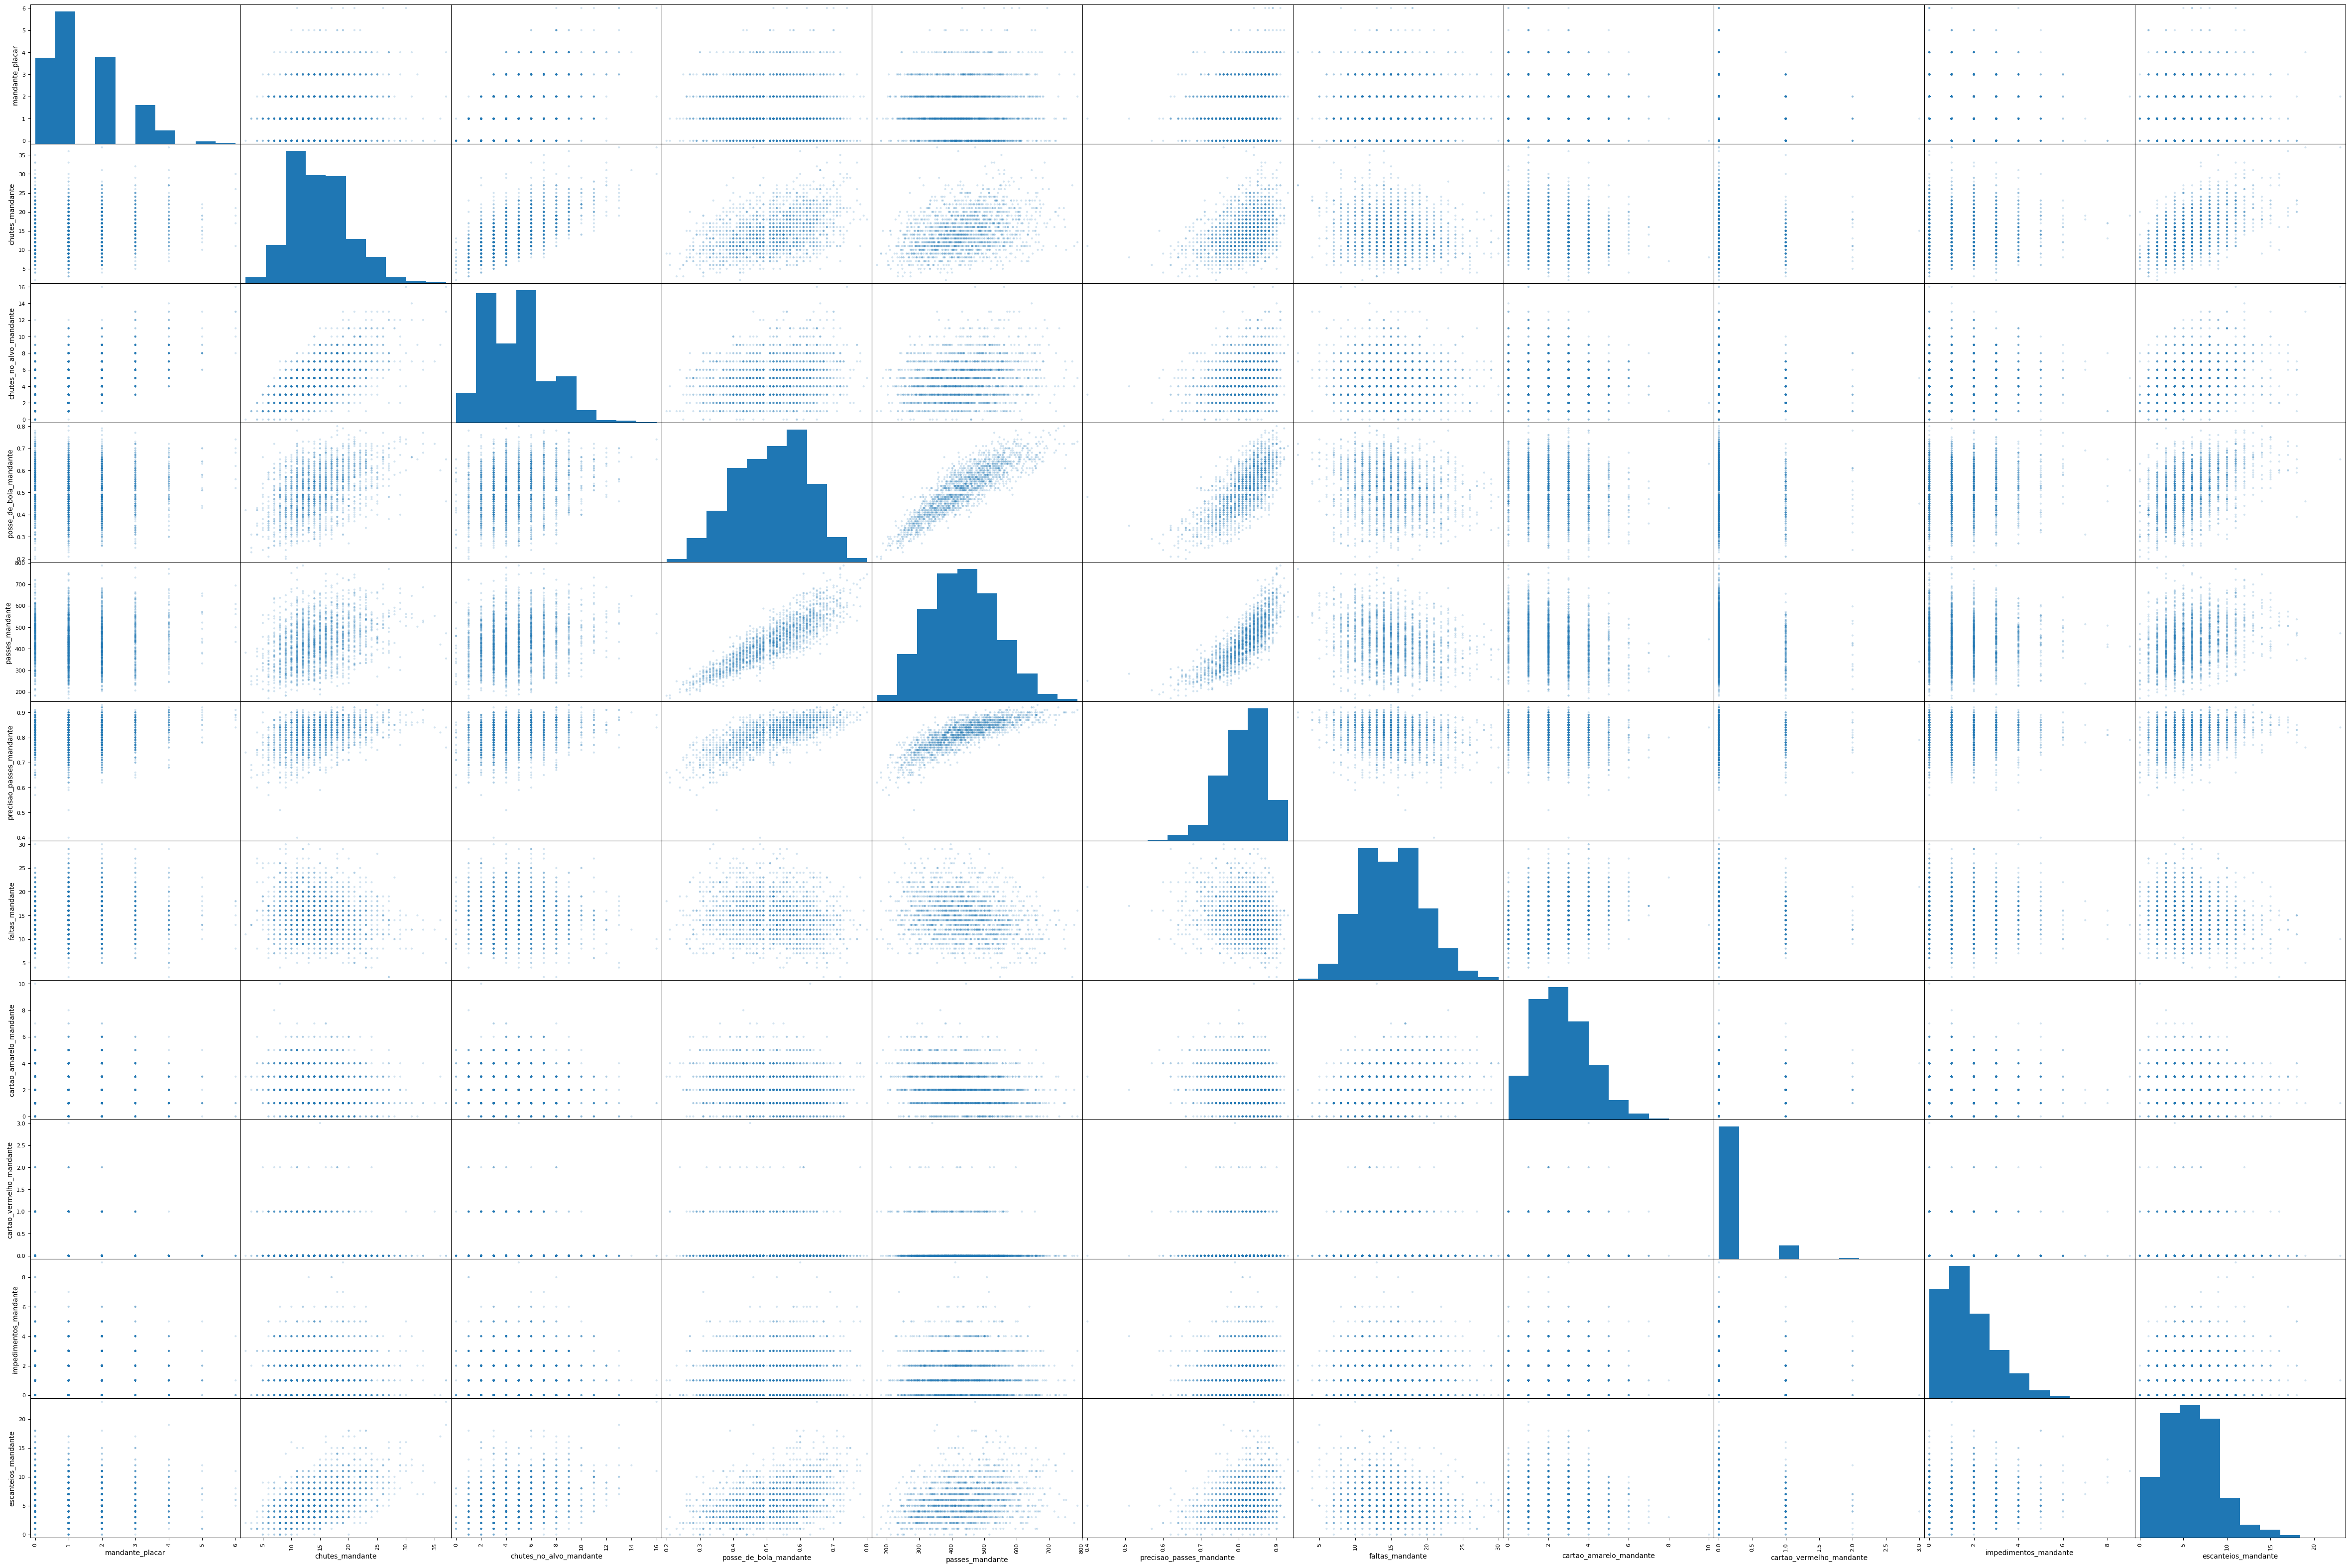

In [ ]:
#Distribuição dos mandantes
scatter_matrix(df[attmandante], figsize=(60,40), alpha=0.2)


array([[<Axes: xlabel='visitante_placar', ylabel='visitante_placar'>,
        <Axes: xlabel='chutes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='chutes_no_alvo_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='posse_de_bola_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='passes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='precisao_passes_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='faltas_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='cartao_amarelo_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='cartao_vermelho_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='impedimentos_visitante', ylabel='visitante_placar'>,
        <Axes: xlabel='escanteios_visitante', ylabel='visitante_placar'>],
       [<Axes: xlabel='visitante_placar', ylabel='chutes_visitante'>,
        <Axes: xlabel='chutes_visitante', ylabel='chutes_visitante'>,
        <Axes: xlabel='chutes_no_alvo_

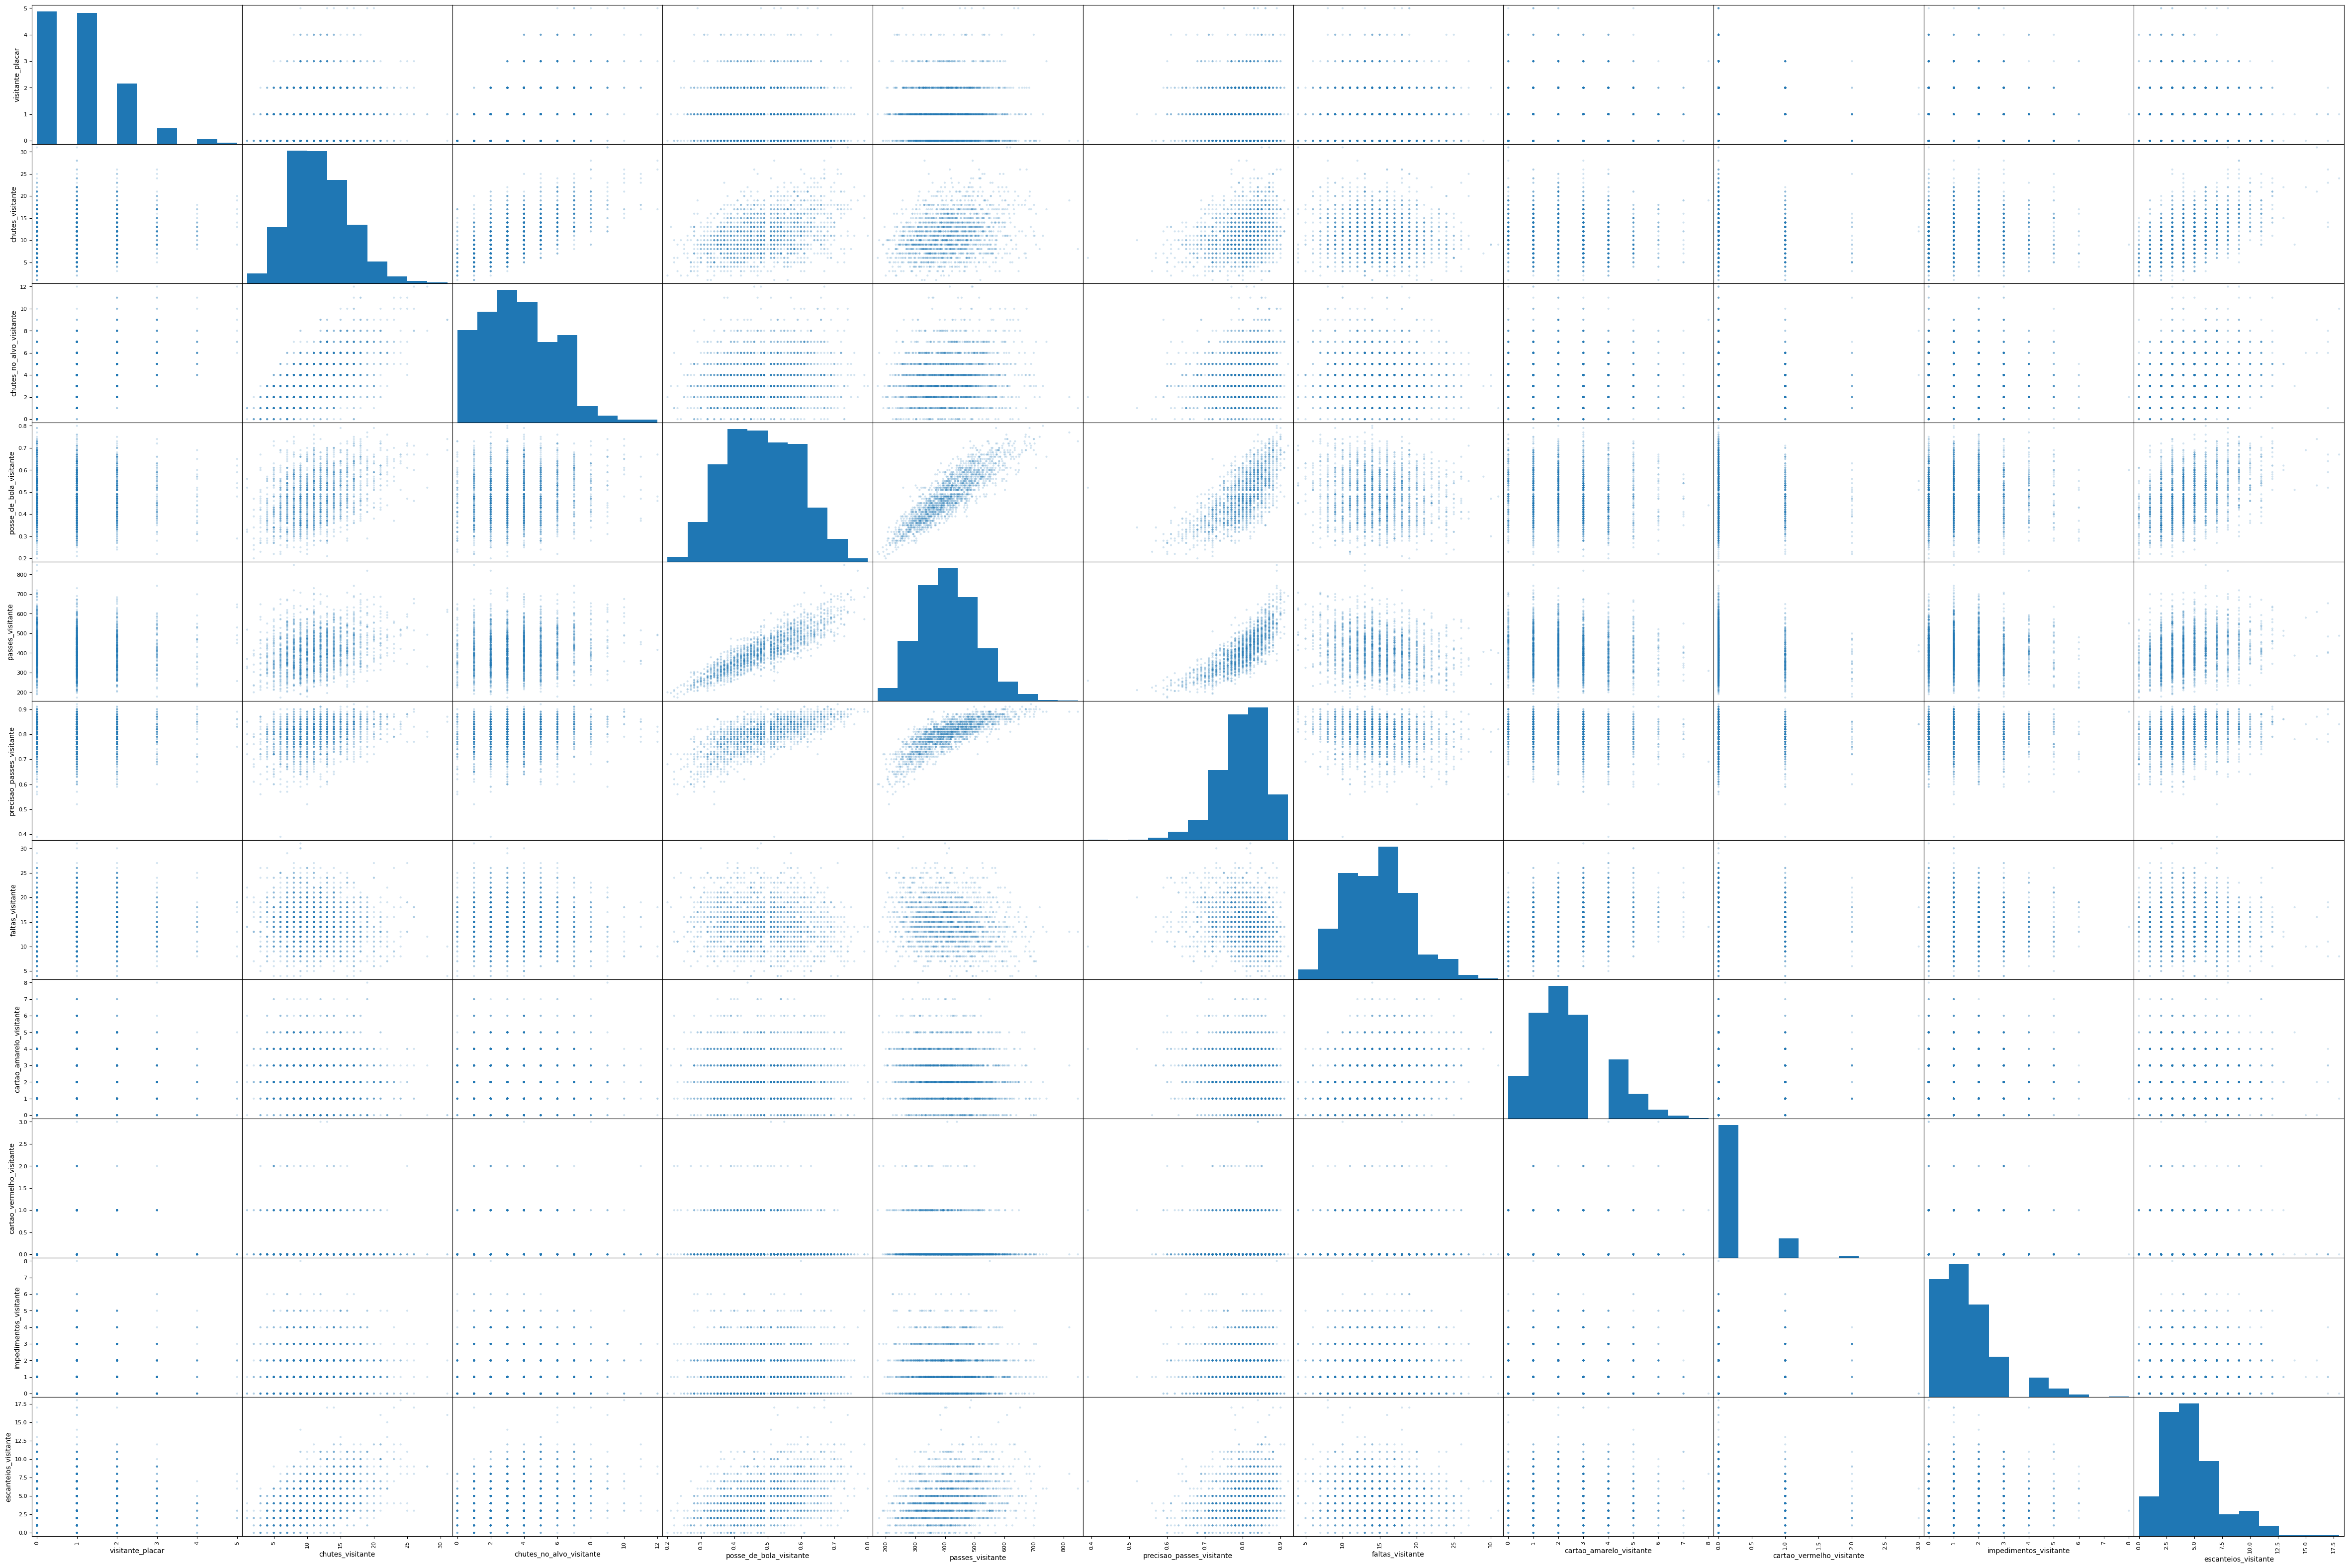

In [ ]:
scatter_matrix(df[attvisitante], figsize=(60,40), alpha=0.2)